<a href="https://colab.research.google.com/github/udayPatil45/-Netflix-WIDS/blob/main/WEEK_1_2_3_Combine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 1

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Chess.csv')
df.head(5)

,Position (in January),Name,ELO,Date,Age
0,1,Carlsen,2862,2021 Jan,30
1,2,Caruana,2823,2021 Jan,28
2,3,Ding Liren,2791,2021 Jan,28
3,4,Nepomniachtchi,2789,2021 Jan,30
4,5,Vachier-Lagrave,2784,2021 Jan,30


In [11]:
#step 1
hg = df.sort_values(['ELO'], ascending=[0])
print("player stats with the highest Elo:")
print(hg[['Name','ELO']].head(3))

#step 2
hg_10 = hg.drop_duplicates(subset='Name')
print(hg_10[['Name', 'ELO']].head(5))


player stats with the highest Elo:
        Name   ELO
20   Carlsen  2872
140  Carlsen  2872
120  Carlsen  2862
           Name   ELO
20      Carlsen  2872
420    Kasparov  2851
41      Caruana  2828
42   Mamedyarov  2817
43   Ding Liren  2813


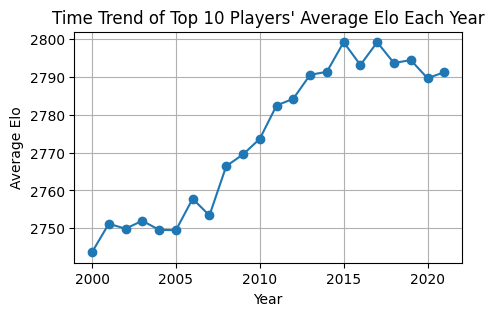

In [12]:
#step 3
df['Year'] = df['Date'].str[:4].astype(int)
average_elo_per_year = []
for year in df['Year'].unique():
    df_year = df[df['Year'] == year]
    top_10_that_year = df_year[0:10]
    avg_elo = top_10_that_year['ELO'].mean()
    average_elo_per_year.append((year, avg_elo))
average_elo_df = pd.DataFrame(average_elo_per_year, columns=['Year', 'Average Elo'])
plt.figure(figsize=(5, 3))
plt.plot(average_elo_df['Year'], average_elo_df['Average Elo'], marker='o')
plt.title('Time Trend of Top 10 Players\' Average Elo Each Year')
plt.xlabel('Year')
plt.ylabel('Average Elo')
plt.grid(True)
plt.show()

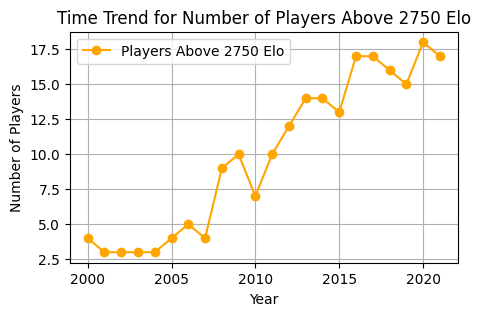

In [13]:
#step 4
def count_players_above_threshold(data, threshold=2750):
    return (
        data[data['ELO'] > threshold]
        .groupby('Year')['Name']
        .nunique()
    )
players_above_2750 = count_players_above_threshold(df)
plt.figure(figsize=(5, 3))
plt.plot(players_above_2750.index, players_above_2750.values, marker='o', color='orange', label='Players Above 2750 Elo')
plt.title("Time Trend for Number of Players Above 2750 Elo")
plt.xlabel("Year")
plt.ylabel("Number of Players")
plt.grid()
plt.legend()
plt.show()

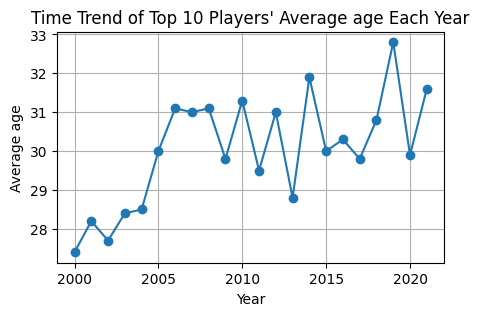

In [14]:
# step 5
df['Year'] = df['Date'].str[:4].astype(int)
average_age_per_year = []
for year in df['Year'].unique():
    df_year = df[df['Year'] == year]
    top_10_that_year = df_year[0:10]
    avg_age = top_10_that_year['Age'].mean()
    average_age_per_year.append((year, avg_age))
average_age_df = pd.DataFrame(average_age_per_year, columns=['Year', 'Average age'])
plt.figure(figsize=(5, 3))
plt.plot(average_age_df['Year'], average_age_df['Average age'], marker='o')
plt.title('Time Trend of Top 10 Players\' Average age Each Year')
plt.xlabel('Year')
plt.ylabel('Average age')
plt.grid(True)
plt.show()


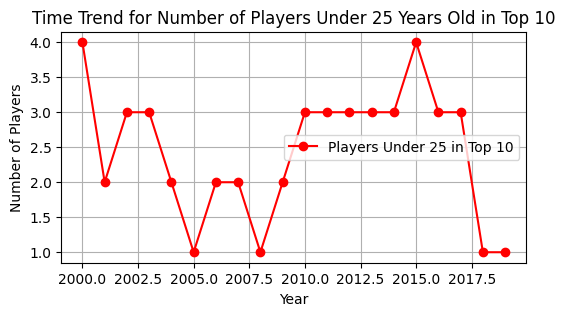

In [15]:
#step 6
def count_players_under_age(data, age_limit=25, top_n=10):
    yearly_age = (
        data.groupby(['Year', 'Name'])[['ELO', 'Age']]
        .max()
        .reset_index()
        .sort_values(by=['Year', 'ELO'], ascending=[True, False])
    )
    yearly_age = yearly_age.groupby('Year').head(top_n)
    return (yearly_age[yearly_age['Age'] < age_limit]
            .groupby('Year')['Name']
            .nunique())
players_under_25 = count_players_under_age(df)
plt.figure(figsize=(6, 3))
plt.plot(players_under_25.index, players_under_25.values, marker='o', color='red', label='Players Under 25 in Top 10')
plt.title("Time Trend for Number of Players Under 25 Years Old in Top 10")
plt.xlabel("Year")
plt.ylabel("Number of Players")
plt.grid()
plt.legend()
plt.show()


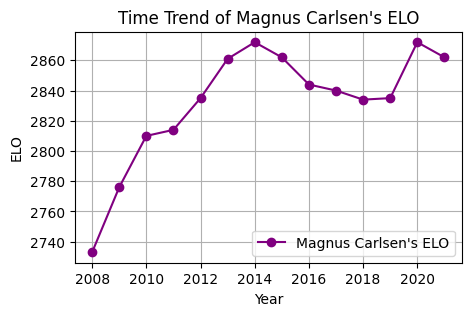

In [16]:
#step 7
def track_player_elo(data, player_name):
    return data[data['Name'] == player_name].groupby('Year')['ELO'].mean()

magnus_elo_trend = track_player_elo(df, 'Carlsen')

plt.figure(figsize=(5, 3))
plt.plot(magnus_elo_trend.index, magnus_elo_trend.values, marker='o', color='purple', label="Magnus Carlsen's ELO")
plt.title("Time Trend of Magnus Carlsen's ELO")
plt.xlabel("Year")
plt.ylabel("ELO")
plt.grid()
plt.legend()
plt.show()

# WEEK 2

In [17]:
import pandas as pd

#Step1
# Load dataset
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

# Display first 3 rows
print(df.head(3))

# Examine dataset structure and summary
print(df.info())
print(df.describe())

           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55287 entries, 0 to 55286
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             55287 non-null  object 
 1   AverageTemperature             51671 non-null  float64
 2   AverageTemperatureUncertainty  52409 non-null  float64
 3   Country                        55286 non-null  object 
dtypes: float64(2), object(2)
memory usage: 1.7+ MB
None
       AverageTemperature  AverageTemperatureUncertainty
count        51671.000000                   52409.000000
mean            17.790581                       0.992664
std         

In [18]:
#step2
print(df.isnull().sum())
df = df.dropna()
df['AverageTemperature'] = df['AverageTemperature'].interpolate()

#step 3
df['dt'] = pd.to_datetime(df['dt'])
df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month
df['day'] = df['dt'].dt.day
print(df)


dt                                  0
AverageTemperature               3616
AverageTemperatureUncertainty    2878
Country                             1
dtype: int64
              dt  AverageTemperature  AverageTemperatureUncertainty  Country  \
0     1743-11-01               4.384                          2.294    Åland   
5     1744-04-01               1.530                          4.680    Åland   
6     1744-05-01               6.702                          1.789    Åland   
7     1744-06-01              11.609                          1.577    Åland   
8     1744-07-01              15.342                          1.410    Åland   
...          ...                 ...                            ...      ...   
55281 1790-07-01              16.488                          2.442  Belarus   
55282 1790-08-01              15.668                          2.432  Belarus   
55283 1790-09-01              11.441                          2.513  Belarus   
55284 1790-10-01               4.66

In [ ]:
#step 4
threshold = 2.0
filtered_df = df[df['AverageTemperatureUncertainty'] <= threshold]
print("Original size:", df.shape)
print("Filtered size:", filtered_df.shape)
yearly_data = filtered_df.groupby('Year').agg({
    'AverageTemperature': 'mean',
    'AverageTemperatureUncertainty': 'mean'
}).reset_index()

import matplotlib.pyplot as plt
plt.errorbar(
    yearly_data['Year'],
    yearly_data['AverageTemperature'],
    yerr=yearly_data['AverageTemperatureUncertainty'],
    fmt='-o', label='Temperature Trend'
)
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Temperature Trend with Uncertainty')
plt.legend()
plt.show()

In [ ]:
plt.plot(
    yearly_data['Year'],
    yearly_data['AverageTemperatureUncertainty'], label='Uncertainty Trend'
)
plt.xlabel('Year')
plt.ylabel('Uncertainty (°C)')
plt.title('Trend in Average Temperature Uncertainty')
plt.legend()
plt.show()
high_uncertainty = yearly_data[yearly_data['AverageTemperatureUncertainty'] > threshold]
print(high_uncertainty)

#step 5
filtered_df.to_csv('cleaned_temperatures.csv', index=False)

# WEEK 3

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration and Summary
airbnb_data = pd.read_csv("AB_NYC_2019.csv")  # Replace with the dataset path
print(airbnb_data.info())
print(airbnb_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Categorical Columns: Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')
Numerical Columns: Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


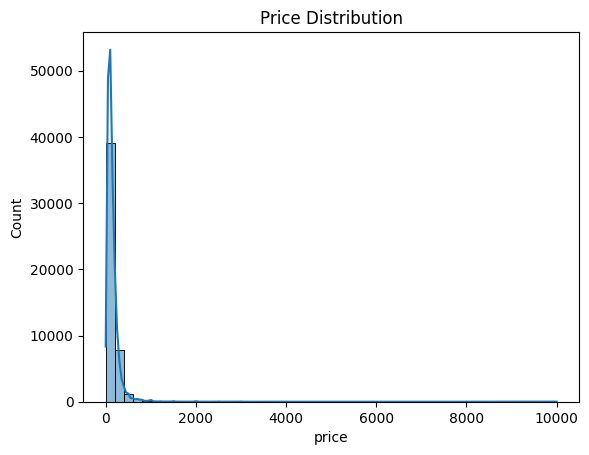

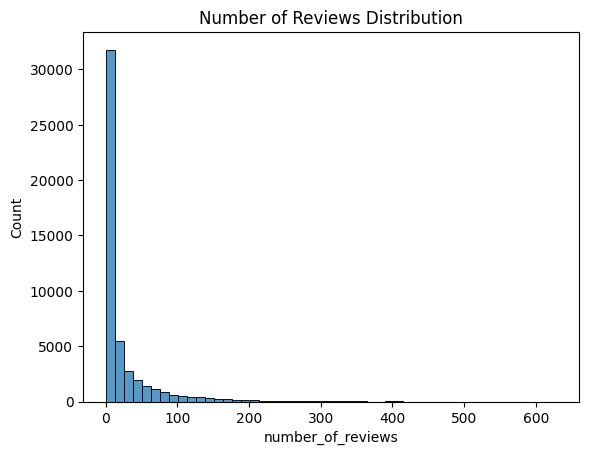

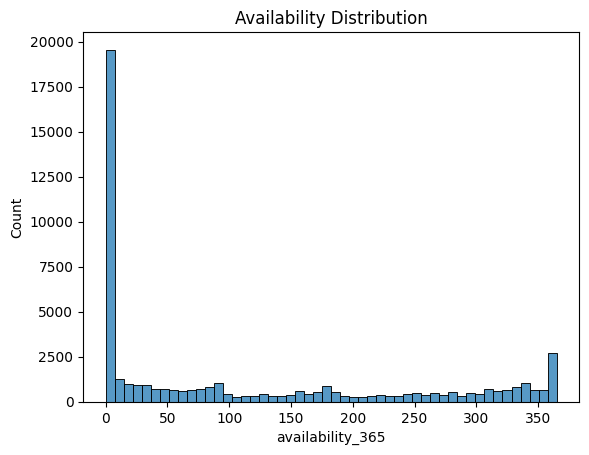

In [21]:
# Verifying Data
categorical_columns = airbnb_data.select_dtypes(include=['object']).columns
numerical_columns = airbnb_data.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

sns.histplot(airbnb_data['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()
sns.histplot(airbnb_data['number_of_reviews'], bins=50, kde=False)
plt.title('Number of Reviews Distribution')
plt.show()
sns.histplot(airbnb_data['availability_365'], bins=50, kde=False)
plt.title('Availability Distribution')
plt.show()

In [22]:
# Data Cleaning
missing_values = airbnb_data.isnull().sum()
print("Missing Values:\n", missing_values)

duplicated_rows = airbnb_data.duplicated().sum()
print("Number of duplicate rows:", duplicated_rows)
airbnb_data.drop_duplicates(inplace=True)

Missing Values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
Number of duplicate rows: 0


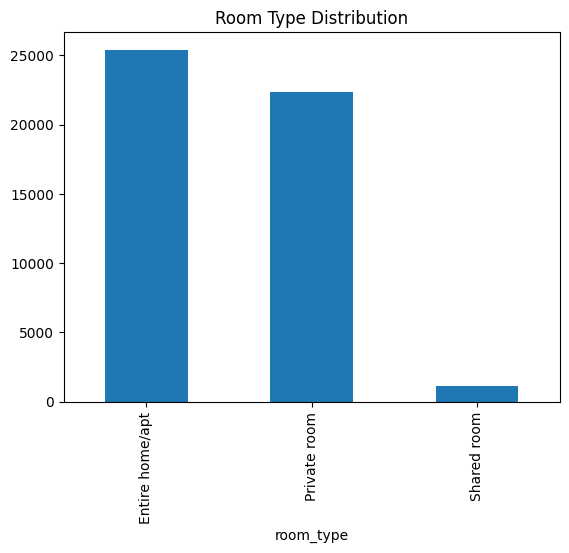

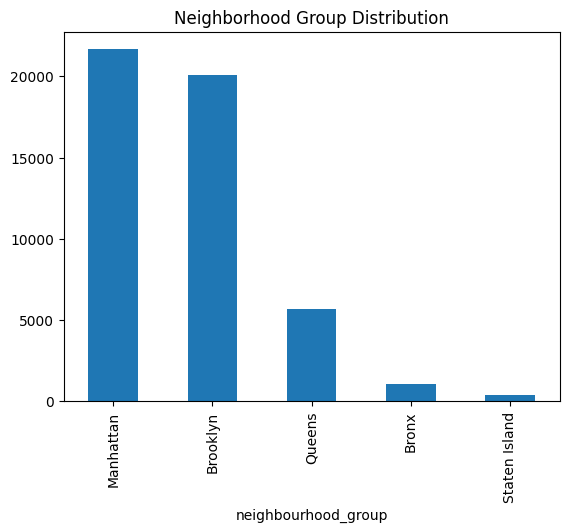

In [23]:
# Categorical Data Processing
room_type_dist = airbnb_data['room_type'].value_counts()
room_type_dist.plot(kind='bar', title="Room Type Distribution")
plt.show()
neighborhood_dist = airbnb_data['neighbourhood_group'].value_counts()
neighborhood_dist.plot(kind='bar', title="Neighborhood Group Distribution")
plt.show()
airbnb_data = pd.get_dummies(airbnb_data, columns=['room_type', 'neighbourhood_group'], drop_first=True)

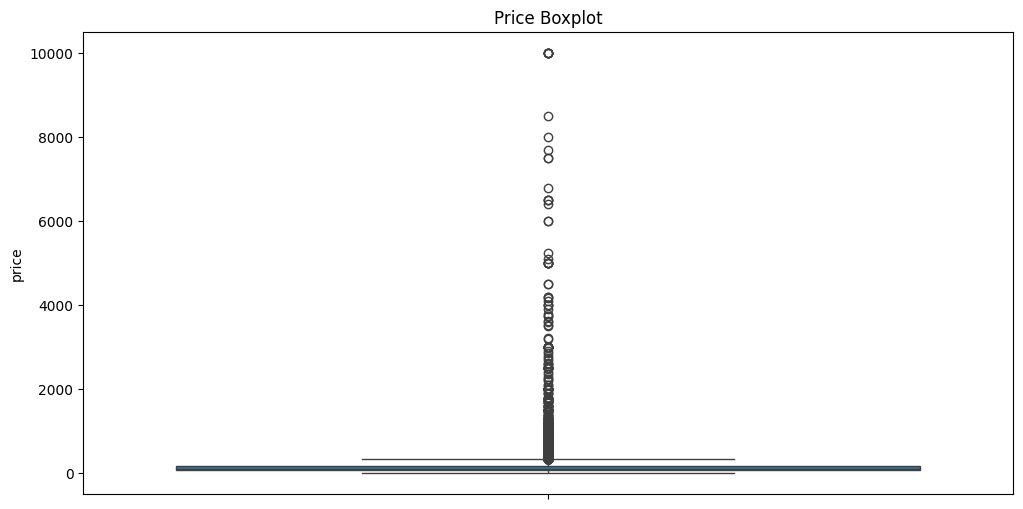

/tmp/ipython-input-24-1905114751.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_data['zscore_price'] = zscore(airbnb_data['price'])


In [24]:
# Outlier Detection and Handling
plt.figure(figsize=(12, 6))
sns.boxplot(airbnb_data['price'])
plt.title('Price Boxplot')
plt.show()
Q1 = airbnb_data['price'].quantile(0.25)
Q3 = airbnb_data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
airbnb_data = airbnb_data[(airbnb_data['price'] >= lower_bound) & (airbnb_data['price'] <= upper_bound)]

from scipy.stats import zscore
airbnb_data['zscore_price'] = zscore(airbnb_data['price'])
airbnb_data = airbnb_data[airbnb_data['zscore_price'].abs() < 3]


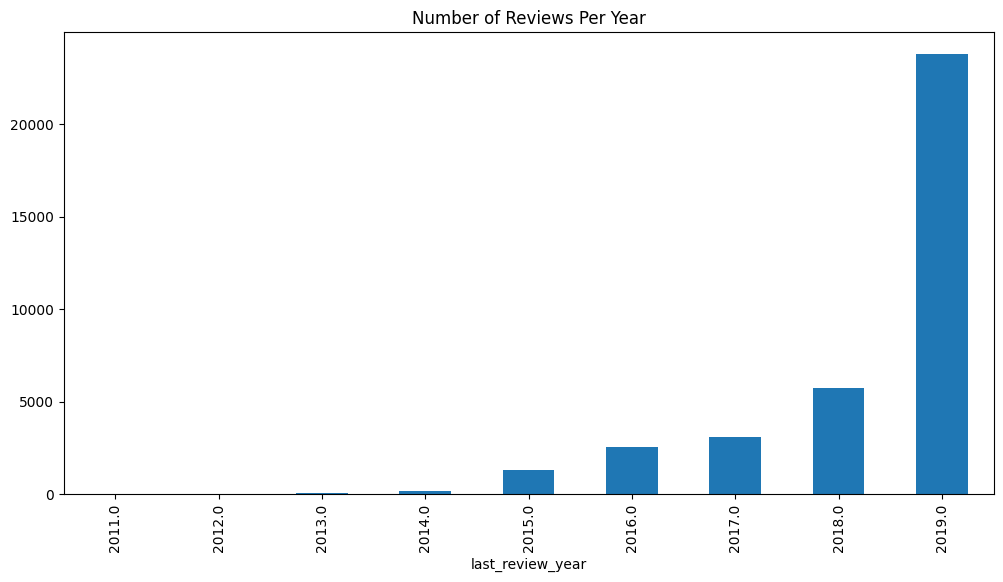

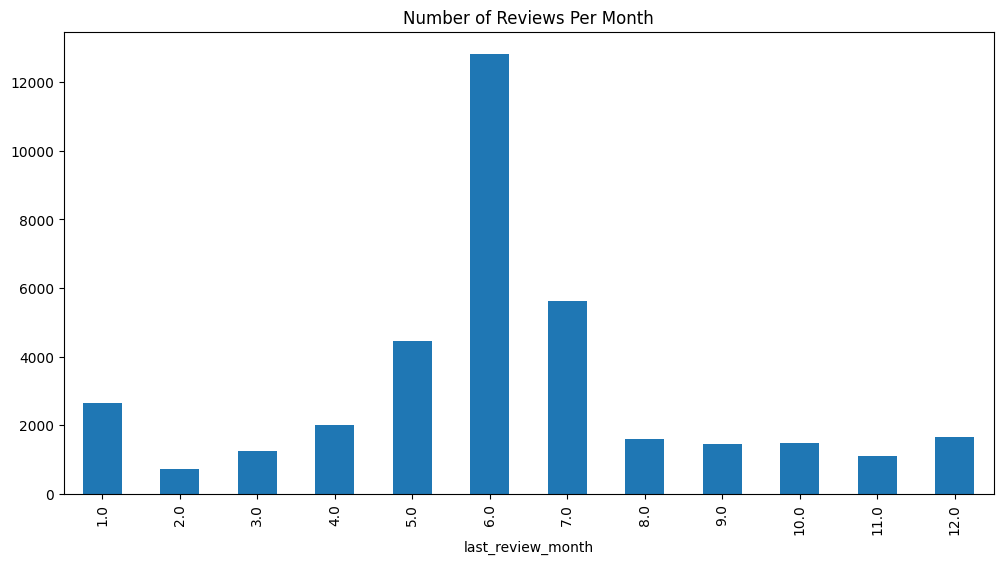

In [25]:
# Date Transformation
airbnb_data['last_review'] = pd.to_datetime(airbnb_data['last_review'], errors='coerce')
airbnb_data['last_review_year'] = airbnb_data['last_review'].dt.year
reviews_per_year = airbnb_data.groupby('last_review_year').size()
plt.figure(figsize=(12, 6))
reviews_per_year.plot(kind='bar')
plt.title('Number of Reviews Per Year')
plt.show()
airbnb_data['last_review_month'] = airbnb_data['last_review'].dt.month
reviews_per_month = airbnb_data.groupby('last_review_month').size()
plt.figure(figsize=(12, 6))
reviews_per_month.plot(kind='bar')
plt.title('Number of Reviews Per Month')
plt.show()

In [ ]:
# Advanced Analysis
from sklearn.cluster import KMeans
cluster_data = airbnb_data[['price', 'minimum_nights', 'availability_365']].dropna()
kmeans = KMeans(n_clusters=4, random_state=42).fit(cluster_data)
airbnb_data['cluster'] = kmeans.labels_
sns.scatterplot(x='price', y='availability_365', hue='cluster', data=airbnb_data)
plt.title('Clusters of Rentals')
plt.show()